In [40]:
from catboost import CatBoostClassifier
from sklearn.metrics import ndcg_score
import numpy as np
from sklearn.utils import shuffle

def evaluate_model(model, X_test, y_test, k = 10):
#     ans = [int(model.predict_proba(X_test)[i]) for i in range(len(y_test))]
    ans = model.predict_proba(X_test)
    res = []
    for arr in ans:
        sorted_arr = sorted(arr)[:k]
        fl = False
        for i in sorted_arr:
            if (list(arr).index(i)) <= k:
                fl = True
        res.append(fl)
    return res

In [41]:
modelLibrosa = CatBoostClassifier()
modelLibrosa.load_model("Librosa_model2")
modelChroma = CatBoostClassifier()
modelChroma.load_model("Chordina_model")
modelChordino = CatBoostClassifier()
modelChordino.load_model("catboost")

In [50]:
import pandas as pd
testLibrosa = pd.read_csv("TrainLibrossa.csv", index_col="Unnamed: 0")
testLibrosa = shuffle(testLibrosa)
testChroma = pd.read_csv("TestChordino.csv",index_col="Unnamed: 0")

In [51]:
testLibrosa.head()

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,target
2615,12.678095,708,12.701315,712,12.724535,612,12.747755,534,12.770975,282,...,1232,16.114649,1376,16.137868,1360,16.161088,1376,16.184308,1440,1224
3310,147.307392,3332,147.330612,3208,147.353832,2628,147.400272,2692,147.423492,2628,...,3586,151.626304,3202,151.649524,3140,151.695964,3108,151.719184,3138,3330
3241,40.681361,3344,40.751020,3600,40.797460,3344,40.820680,1632,40.843900,1472,...,1158,45.046712,1286,45.069932,2310,45.093152,1286,45.116372,2316,2372
653,113.777778,1192,113.824218,1224,113.847438,1424,113.870658,2464,113.940317,3648,...,51,117.632290,85,117.748390,149,117.771610,293,117.794830,594,2340
3293,67.918367,2570,67.941587,3090,68.080907,3106,68.127347,3138,68.150567,3106,...,3140,72.144399,2212,72.167619,2436,72.237279,3204,72.283719,2692,2820


In [52]:
testChroma = testChroma.drop('99', axis = 1)
testChroma.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,target
0,115,0.371519,150,0.092880,182,4.179592,150,5.665669,11,9.845261,...,1.950476,150,2.043356,23,1.764717,12,2.229116,23,2.043356,42
1,150,0.092880,182,4.179592,150,5.665669,11,9.845261,150,2.229116,...,2.043356,23,1.764717,12,2.229116,23,2.043356,42,2.043356,23
2,182,4.179592,150,5.665669,11,9.845261,150,2.229116,129,7.151746,...,1.764717,12,2.229116,23,2.043356,42,2.043356,23,1.950476,12
3,150,5.665669,11,9.845261,150,2.229116,129,7.151746,150,3.065034,...,2.229116,23,2.043356,42,2.043356,23,1.950476,12,1.950476,23
4,11,9.845261,150,2.229116,129,7.151746,150,3.065034,84,13.281814,...,2.043356,42,2.043356,23,1.950476,12,1.950476,23,1.950476,150


In [53]:
y_chroma = testChroma['target']
testChroma = testChroma.drop('target', axis = 1)
y_librosa = testLibrosa['target']
testLibrosa = testLibrosa.drop('target', axis = 1)

In [54]:
def PLT_ARR(arr):
    res = []
    for i in range(len(arr)):
        res.append(sum(arr[i]) / len(arr[i]))
    return res

In [55]:
import matplotlib.pyplot as plt

In [56]:
a = [8, 10, 15, 20, 35, 50, 100, 300]
ans = [evaluate_model(modelChroma, testChroma, y_chroma, i) for i in a]
ans2 = [evaluate_model(modelLibrosa, testLibrosa, y_librosa, i) for i in a]
ans3 = [evaluate_model(modelChordino, testChroma, y_chroma, i) for i in a]

<AxesSubplot:xlabel='period'>

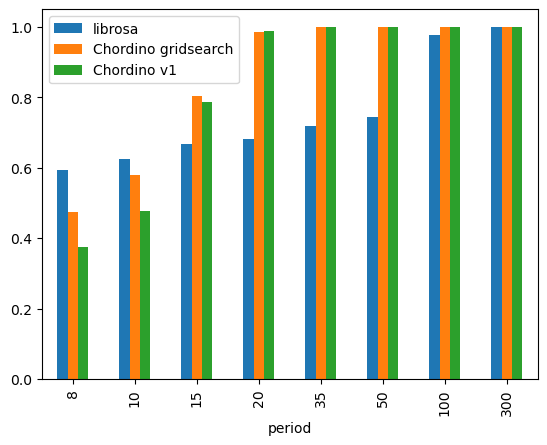

In [57]:
y1 = PLT_ARR(ans)
y2 = PLT_ARR(ans2)
y3 = PLT_ARR(ans3)
df = pd.DataFrame({'period': [8, 10, 15, 20, 35, 50, 100, 300],
 'librosa': y2,
 'Chordino gridsearch': y1,
 'Chordino v1' : y3   
})
df[['period', 'librosa', 'Chordino gridsearch','Chordino v1']].plot(x='period', kind='bar') 